<a href="https://colab.research.google.com/github/MusabUmama/Gala-groceries-Stock-prediction-model/blob/main/Gala_groceries_Stock_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path_sales = "/content/sales.csv"

sales_df = pd.read_csv(path_sales)
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.dropna()
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'])
sales_df['product_id'] = pd.to_numeric(sales_df['product_id'].str.replace('[^0-9]', ''), errors='coerce')
sales_df.head()

<ipython-input-3-2cede8aaeb8d>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  sales_df['product_id'] = pd.to_numeric(sales_df['product_id'].str.replace('[^0-9]', ''), errors='coerce')


,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3.610198e+19,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,8.146384e+15,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7.554306e+20,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,8.083482e+19,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7.586606e+18,fruit,basic,4.49,2,8.98,debit card


In [ ]:
path_stock = "/content/sensor_stock_levels.csv"
stock_df = pd.read_csv(path_stock)
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.dropna()
stock_df['timestamp'] = pd.to_datetime(stock_df['timestamp'])
stock_df['id'] = pd.to_numeric(stock_df['id'].str.replace('[^0-9]', ''), errors='coerce')
stock_df.head()

<ipython-input-4-e98f4a25a0d1>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  stock_df['id'] = pd.to_numeric(stock_df['id'].str.replace('[^0-9]', ''), errors='coerce')


,id,timestamp,product_id,estimated_stock_pct
0,4.220505e+24,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,2.612268e+19,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,9.892877e+19,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,8.568325e+17,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,8.322473e+21,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
path_storage = "/content/sensor_storage_temperature.csv"
temp_df = pd.read_csv(path_storage)
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.dropna()
temp_df['timestamp'] = pd.to_datetime(temp_df['timestamp'])
temp_df['id'] = pd.to_numeric(temp_df['id'].str.replace('[^0-9]', ''), errors='coerce')
temp_df.head()

<ipython-input-5-7ec75b76ee92>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  temp_df['id'] = pd.to_numeric(temp_df['id'].str.replace('[^0-9]', ''), errors='coerce')


,id,timestamp,temperature
0,1.180428e+15,2022-03-07 15:55:20,2.96
1,4.866403e+20,2022-03-01 09:18:22,1.88
2,3.470717e+21,2022-03-04 15:12:26,1.78
3,9.500357e+24,2022-03-02 12:30:42,2.18
4,4.619925e+15,2022-03-05 09:09:33,1.38


In [ ]:
merged_sales_stock = sales_df.merge(stock_df, on=['timestamp'], how='inner')

merged_data = merged_sales_stock.merge(temp_df, on=['timestamp'], how='inner')

In [ ]:
merged_data.describe()

,product_id_x,unit_price,quantity,total,id_x,estimated_stock_pct,id_y,temperature
count,4.700000e+01,47.000000,47.000000,47.000000,4.700000e+01,47.000000,4.700000e+01,47.000000
mean,3.021921e+26,8.185745,2.702128,20.655957,1.938207e+24,0.419787,3.417670e+23,0.519787
std,1.169792e+27,5.667871,1.101676,17.059625,1.039868e+25,0.341852,1.531206e+24,12.307192
min,3.026408e+11,0.190000,1.000000,0.760000,4.751941e+14,0.020000,2.837135e+15,-26.580000
25%,2.481045e+17,4.090000,2.000000,8.570000,2.277962e+19,0.100000,4.480429e+18,-2.695000
50%,8.083482e+19,7.190000,3.000000,17.980000,3.322142e+20,0.300000,7.969453e+19,0.290000
75%,1.416345e+21,10.090000,4.000000,25.020000,1.762637e+22,0.795000,5.173622e+21,1.915000
max,4.734239e+27,19.990000,4.000000,77.960000,7.093520e+25,1.000000,8.795717e+24,29.710000


In [ ]:
merged_data['hour_of_day'] = merged_data['timestamp'].dt.hour
merged_data['day_of_week'] = merged_data['timestamp'].dt.dayofweek
merged_data['month_of_year'] = merged_data['timestamp'].dt.month

In [ ]:
merged_data.fillna(merged_data.mean(), inplace=True)

<ipython-input-9-c48191d97aed>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  merged_data.fillna(merged_data.mean(), inplace=True)
<ipython-input-9-c48191d97aed>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data.fillna(merged_data.mean(), inplace=True)


In [ ]:
merged_data.head()

,transaction_id,timestamp,product_id_x,category,customer_type,unit_price,quantity,total,payment_type,id_x,product_id_y,estimated_stock_pct,id_y,temperature,hour_of_day,day_of_week,month_of_year
0,9391b211-ae28-400e-b8c6-d55f87479f91,2022-03-02 10:11:09,1.214150e+14,fruit,non-member,4.99,3,14.97,e-wallet,9.714154e+17,a1958c40-eafa-47e8-8973-f561d284c97a,0.51,8.919885e+16,-1.06,10,2,3
1,7fe2870d-5d4b-428f-a149-9e814c0ea514,2022-03-03 13:44:07,3.500193e+22,fruit,premium,0.49,3,1.47,cash,7.937776e+22,ed7f6b14-67c9-42a4-8576-c803020eedda,0.04,9.011135e+16,-1.03,13,3,3
2,18e2bdf6-0aba-409e-b673-e826b6fffe6d,2022-03-06 16:31:40,8.083482e+19,fruit,premium,0.19,4,0.76,cash,7.793348e+21,0f493675-d59d-45dd-9406-084932bf41c1,0.38,9.747226e+22,-2.53,16,6,3
3,9e25b252-9fb9-4920-939c-301a88a8ffcd,2022-03-01 14:30:13,3.610198e+19,fruit,non-member,3.99,3,11.97,credit card,2.733555e+23,aa8a13dc-c4bf-4743-89fc-7cc6ebb02215,0.84,5.928905e+19,-2.33,14,1,3
4,2d6ad8cf-42ac-44e7-8b35-158379bedbf9,2022-03-05 11:54:03,1.214150e+14,fruit,non-member,4.99,1,4.99,cash,4.751941e+14,00e120bb-89d6-4df5-bc48-a051148e3d03,0.63,4.093033e+18,0.44,11,5,3


In [ ]:
merged_data.to_csv('merged_data.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(merged_data, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
feature_columns = [
    'hour_of_day',
    'day_of_week',
    'month_of_year'
]

In [ ]:
model = LinearRegression()

model.fit(train_data[feature_columns], train_data['estimated_stock_pct'])

LinearRegression()

In [ ]:
predictions = model.predict(test_data[feature_columns])

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_data['estimated_stock_pct'], predictions)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data['estimated_stock_pct'], predictions)

In [ ]:
import numpy as np
rmse = np.sqrt(mse)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test_data['estimated_stock_pct'], predictions)

In [ ]:
print("Mean Absolute Error : ",mae)
print("Mean Squared Error : ",mse)
print("Root Mean Squared Error : ",rmse)
print("Root Squared : ",r2)

Mean Absolute Error :  0.43022288271440023
Mean Squared Error :  0.22814202679848047
Root Mean Squared Error :  0.47764215349828626
Root Squared :  -0.6464740249883121


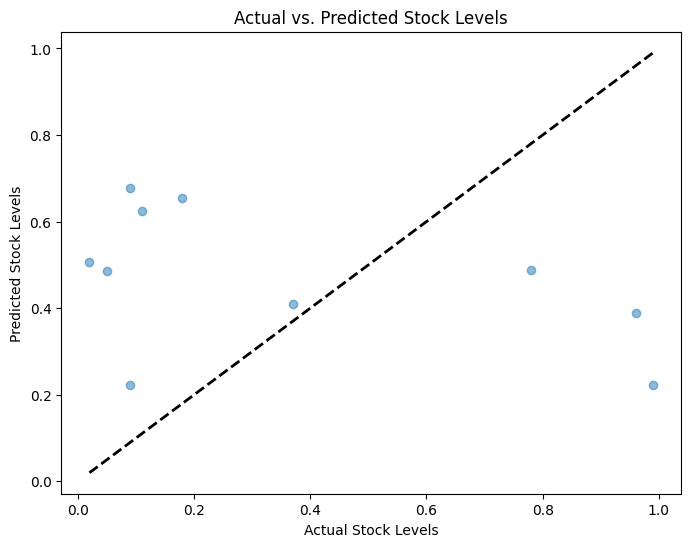

In [ ]:
import matplotlib.pyplot as plt

predictions = model.predict(test_data[feature_columns])
actual_values = test_data['estimated_stock_pct']


plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predictions, alpha=0.5)
plt.xlabel("Actual Stock Levels")
plt.ylabel("Predicted Stock Levels")
plt.title("Actual vs. Predicted Stock Levels")


plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)

plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
}

In [ ]:
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(train_data[feature_columns], train_data['estimated_stock_pct'])

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
tuned_predictions = best_model.predict(test_data[feature_columns])

n_mse = mean_squared_error(test_data['estimated_stock_pct'], tuned_predictions)
n_mae = mean_absolute_error(test_data['estimated_stock_pct'], tuned_predictions)
n_rmse = np.sqrt(n_mse)
n_r2 = r2_score(test_data['estimated_stock_pct'], tuned_predictions)

print("New Mean Absolute Error : ",n_mae)
print("New Mean Squared Error : ",n_mse)
print("New Root Mean Squared Error : ",n_rmse)
print("New Root Squared : ",n_r2)

New Mean Absolute Error :  0.40445363372093024
New Mean Squared Error :  0.19712000936000038
New Root Mean Squared Error :  0.4439819921573401
New Root Squared :  -0.4225917941168007


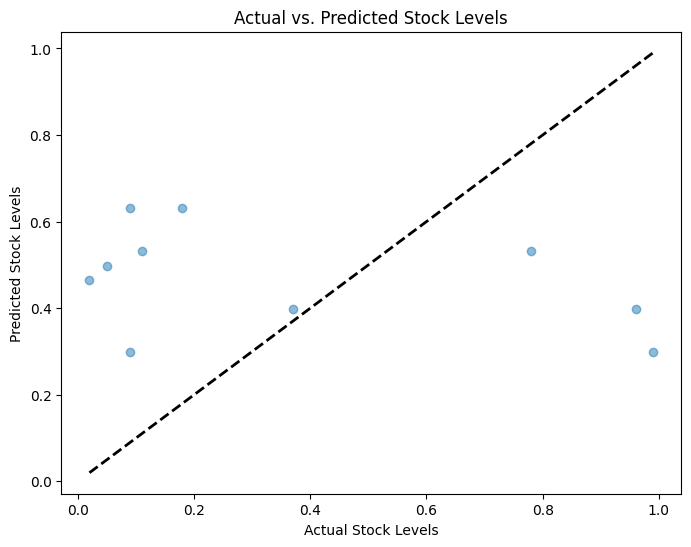

In [ ]:
predictions = model.predict(test_data[feature_columns])
actual_values = test_data['estimated_stock_pct']


plt.figure(figsize=(8, 6))
plt.scatter(actual_values, tuned_predictions, alpha=0.5)
plt.xlabel("Actual Stock Levels")
plt.ylabel("Predicted Stock Levels")
plt.title("Actual vs. Predicted Stock Levels")


plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)

plt.show()
